### MPG Test - Exploratory data analysis

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

The variables

    1. mpg:           continuous (Milles per gallon)
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete - Country
    9. car name:      string (unique for each instance)

In [1]:
import re

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### 1. Create a notebook in collab and load the data.

In [2]:
def load_data(file, csv_file):
    with open(file, 'r') as file:
        content = file.readlines()
    parsed_content = []
    for line in content:
        line = line.replace('\t', ',')
        split_line = line.split(',')
        replaced = re.sub('\s+', ';', split_line[0])
        parsed_content.append(f'{replaced};{split_line[1]}')

    with open(csv_file, 'w') as writer:
        for line in parsed_content:
            writer.writelines(line)
    columns_name = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]
    auto_mpg_data = pd.read_csv(csv_file, sep=';', names=columns_name)
    return columns_name, auto_mpg_data

In [3]:
columns_name, auto_mpg_data_raw = load_data("auto-mpg.data-original", "auto-mpg.csv")
print(auto_mpg_data_raw.info())
auto_mpg_data_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model_year    406 non-null    float64
 7   origin        406 non-null    float64
 8   car_name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


 ### 2. Apply any transformation if it is necessary, (ej categorical to numerical, Miles to Km)}

#### Missing values

I am going to fill in the missing horsepower values with information from the internet because the dataset has few rows so I can better model and remove the missing mpg values.

In [4]:
print(auto_mpg_data_raw.isnull().sum())
auto_mpg_data_raw[auto_mpg_data_raw.isnull().any(axis=1)]

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
10,NaN,4.0,133.0,115.0,3090.0,17.5,70.0,2.0,citroen ds-21 pallas
11,NaN,8.0,350.0,165.0,4142.0,11.5,70.0,1.0,chevrolet chevelle concours (sw)
12,NaN,8.0,351.0,153.0,4034.0,11.0,70.0,1.0,ford torino (sw)
13,NaN,8.0,383.0,175.0,4166.0,10.5,70.0,1.0,plymouth satellite (sw)
14,NaN,8.0,360.0,175.0,3850.0,11.0,70.0,1.0,amc rebel sst (sw)
17,NaN,8.0,302.0,140.0,3353.0,8.0,70.0,1.0,ford mustang boss 302
38,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,1.0,ford pinto
39,NaN,4.0,97.0,48.0,1978.0,20.0,71.0,2.0,volkswagen super beetle 117
133,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,1.0,ford maverick
337,40.9,4.0,85.0,NaN,1835.0,17.3,80.0,2.0,renault lecar deluxe


In [5]:
auto_mpg_data_raw.at[38, 'horsepower'] = 101
auto_mpg_data_raw.at[133, 'horsepower'] = 129
auto_mpg_data_raw.at[337, 'horsepower'] = 53.5
auto_mpg_data_raw.at[343, 'horsepower'] = 118
auto_mpg_data_raw.at[361, 'horsepower'] = 81
auto_mpg_data_raw.at[382, 'horsepower'] = 82

auto_mpg_data_raw = auto_mpg_data_raw[~auto_mpg_data_raw.mpg.isnull()].copy()

In [6]:
auto_mpg_data = auto_mpg_data_raw.copy()
auto_mpg_data_raw.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

#### Create dummies variables according to origin variable

In [7]:
origin = auto_mpg_data.pop('origin')

auto_mpg_data['USA'] = (origin == 1)*1
auto_mpg_data['Europe'] = (origin == 2)*1
auto_mpg_data['Japan'] = (origin == 3)*1

#### Extract the company name of the car_name variable

In [8]:
auto_mpg_data['company_name'] = auto_mpg_data.car_name.str.extract('(^.*?)\s')
auto_mpg_data['company_name'] = auto_mpg_data['company_name'].replace(['volkswagen','vokswagen','vw'],'VW')
auto_mpg_data['company_name'] = auto_mpg_data['company_name'].replace('maxda','mazda')
auto_mpg_data['company_name'] = auto_mpg_data['company_name'].replace('toyouta','toyota')
auto_mpg_data['company_name'] = auto_mpg_data['company_name'].replace('mercedes','mercedes-benz')
auto_mpg_data['company_name'] = auto_mpg_data['company_name'].replace('nissan','datsun')
auto_mpg_data['company_name'] = auto_mpg_data['company_name'].replace('capri','ford')
auto_mpg_data['company_name'] = auto_mpg_data['company_name'].replace(['chevroelt','chevy'],'chevrolet')
auto_mpg_data['company_name'].fillna(value = 'subaru',inplace=True)
auto_mpg_data[auto_mpg_data['company_name'] == ''] = 'subaru'

auto_mpg_data['car_name'] = auto_mpg_data.car_name.str.extract('^.*?(\s.*)')
auto_mpg_data['car_name'].fillna(value = 'subaru',inplace=True)
auto_mpg_data.head()

In [10]:
dummies = pd.get_dummies(auto_mpg_data['company_name'])

auto_mpg_data = pd.concat([auto_mpg_data, dummies], axis=1)
auto_mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name,USA,Europe,...,opel,peugeot,plymouth,pontiac,renault,saab,subaru,toyota,triumph,volvo
0,18,8,307,130,3504,12,70,chevelle malibu,1,0,...,0,0,0,0,0,0,0,0,0,0
1,15,8,350,165,3693,11.5,70,skylark 320,1,0,...,0,0,0,0,0,0,0,0,0,0
2,18,8,318,150,3436,11,70,satellite,1,0,...,0,0,1,0,0,0,0,0,0,0
3,16,8,304,150,3433,12,70,rebel sst,1,0,...,0,0,0,0,0,0,0,0,0,0
4,17,8,302,140,3449,10.5,70,torino,1,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
auto_mpg_data.drop(['car_name', 'company_name'], axis=1)


auto_mpg_data.to_csv('auto_mpg_data_ml.csv', index=False)
auto_mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 405
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   mpg            398 non-null    object
 1   cylinders      398 non-null    object
 2   displacement   398 non-null    object
 3   horsepower     398 non-null    object
 4   weight         398 non-null    object
 5   acceleration   398 non-null    object
 6   model_year     398 non-null    object
 7   car_name       398 non-null    object
 8   USA            398 non-null    object
 9   Europe         398 non-null    object
 10  Japan          398 non-null    object
 11  company_name   398 non-null    object
 12  VW             398 non-null    uint8 
 13  amc            398 non-null    uint8 
 14  audi           398 non-null    uint8 
 15  bmw            398 non-null    uint8 
 16  buick          398 non-null    uint8 
 17  cadillac       398 non-null    uint8 
 18  chevrolet      398 non-null   

### 3. Plot the relationships between the target value ante other variables

In [12]:
auto_mpg_data_relationship = auto_mpg_data_raw.copy()

auto_mpg_data_relationship['country_code'] = auto_mpg_data_relationship.origin.replace([1,2,3],['USA','Europe','Japan'])
auto_mpg_data_relationship.drop(['origin'], axis=1, inplace=True)

auto_mpg_data_relationship['company_name'] = auto_mpg_data_relationship.car_name.str.extract('(^.*?)\s')
auto_mpg_data_relationship['company_name'] = auto_mpg_data_relationship['company_name'].replace(['volkswagen','vokswagen','vw'],'VW')
auto_mpg_data_relationship['company_name'] = auto_mpg_data_relationship['company_name'].replace('maxda','mazda')
auto_mpg_data_relationship['company_name'] = auto_mpg_data_relationship['company_name'].replace('toyouta','toyota')
auto_mpg_data_relationship['company_name'] = auto_mpg_data_relationship['company_name'].replace('mercedes','mercedes-benz')
auto_mpg_data_relationship['company_name'] = auto_mpg_data_relationship['company_name'].replace('nissan','datsun')
auto_mpg_data_relationship['company_name'] = auto_mpg_data_relationship['company_name'].replace('capri','ford')
auto_mpg_data_relationship['company_name'] = auto_mpg_data_relationship['company_name'].replace(['chevroelt','chevy'],'chevrolet')
auto_mpg_data_relationship['company_name'].fillna(value = 'subaru',inplace=True)
auto_mpg_data_relationship[auto_mpg_data_relationship['company_name'] == ''] = 'subaru'

auto_mpg_data_relationship.drop(['car_name'], axis=1, inplace=True)

In [13]:
auto_mpg_data_relationship['horsepower']=auto_mpg_data_relationship['horsepower'].astype('float64')
auto_mpg_data_relationship['displacement']=auto_mpg_data_relationship['displacement'].astype('float64')
auto_mpg_data_relationship['weight']=auto_mpg_data_relationship['weight'].astype('float64')
auto_mpg_data_relationship['acceleration']=auto_mpg_data_relationship['acceleration'].astype('float64')

auto_mpg_data_relationship.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,country_code,company_name
0,18,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet
1,15,8,350.0,165.0,3693.0,11.5,70,USA,buick
2,18,8,318.0,150.0,3436.0,11.0,70,USA,plymouth
3,16,8,304.0,150.0,3433.0,12.0,70,USA,amc
4,17,8,302.0,140.0,3449.0,10.5,70,USA,ford


In [30]:
def categorical_relationship_vs_mpg(variable_name, dataframe):
    print(dataframe.mpg.mean())
    f, ax = plt.subplots(figsize=(20,10))
    fig = sns.boxplot(data=dataframe, x=variable_name, y="mpg")
    fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
    plt.axhline(dataframe.mpg.mean(), color='r', linestyle='dashed', linewidth=2)

def discrete_relationship_vs_mpg(variable_name, dataframe):
    sns.lmplot(x = variable_name, y = 'mpg', data=dataframe)

### Country code vs MPG

23.514572864321615


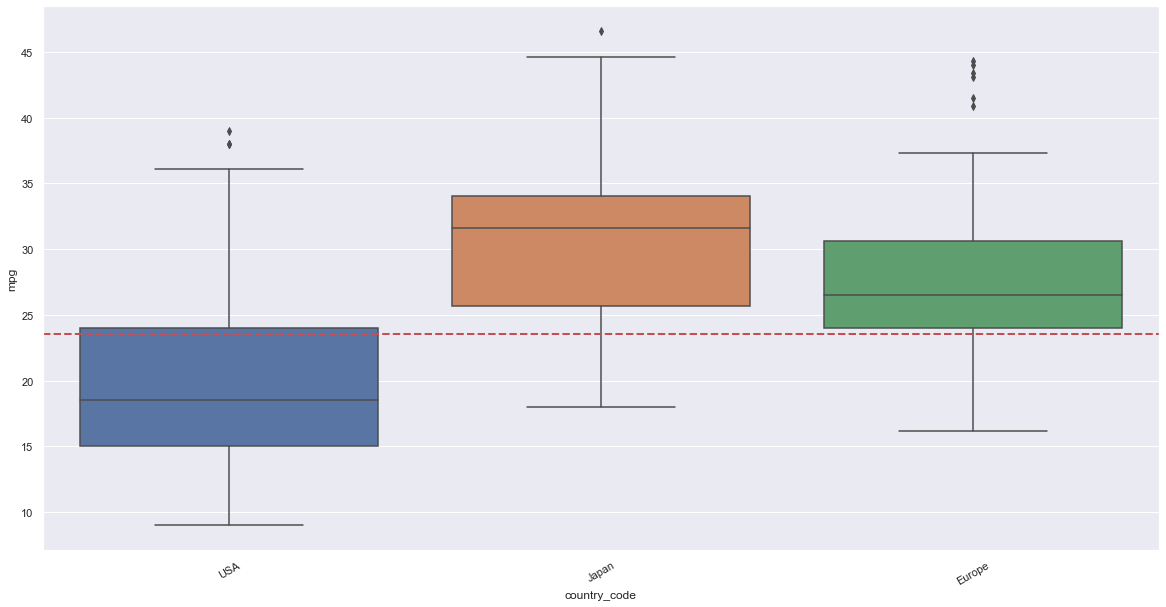

In [31]:
categorical_relationship_vs_mpg('country_code', auto_mpg_data_relationship)

The red line marks the average of mpg with this I can conclude:
    
    * Almost all cars in America (approx. 75%) are under to average of mpg (Miles to gallon)
    * Almost all cars in Japan and Europe are over to average of mpg (Miles to gallon)
This can show that cars made in Japan and Europe have better fuel optimization compared to America.

### Model year vs MPG

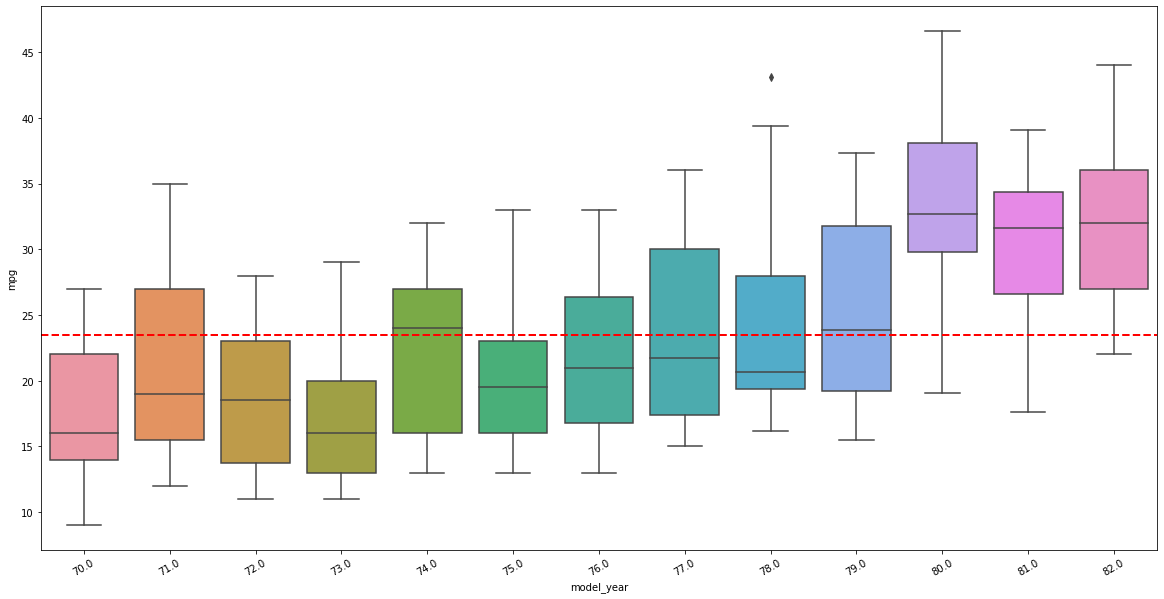

In [16]:
categorical_relationship_vs_mpg('model_year', auto_mpg_data_relationship)

Over time the miles per gallon of the cars produced are increasing, as we can see in the graph. We can also see that in recent years, the cars produced optimize the use of fuel more because more than 75% of the cars are above the average.

### Cylinders vs MPG

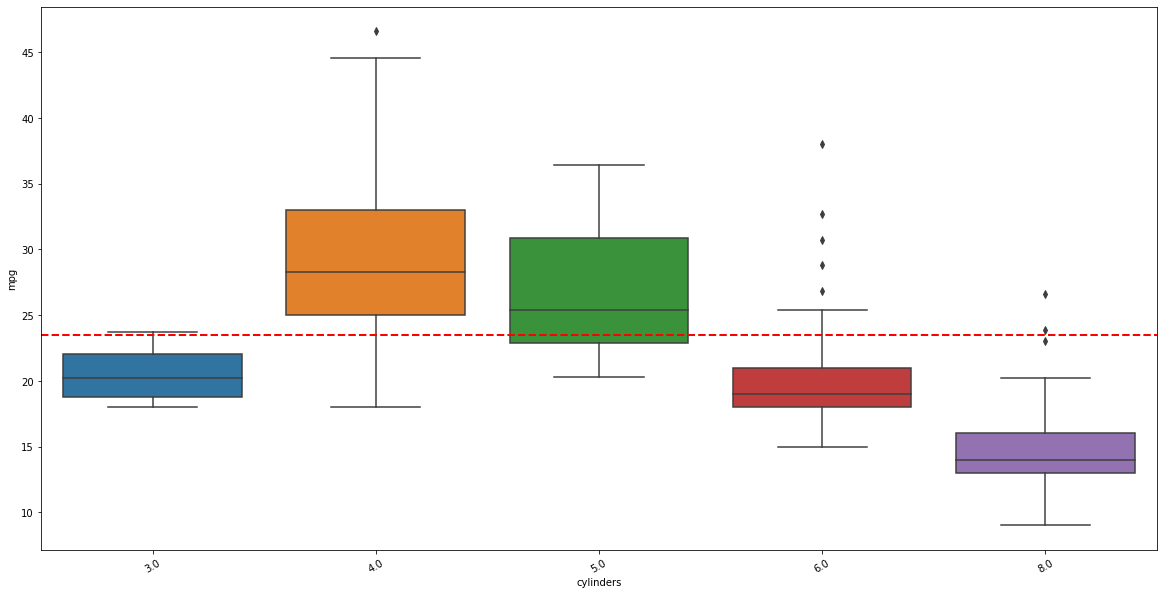

In [17]:
categorical_relationship_vs_mpg('cylinders', auto_mpg_data_relationship)

The most optimal number of cylinders for miles per gallon are 4 and 5 in both categories more than 50% of the data is above average

### Company name vs MPG

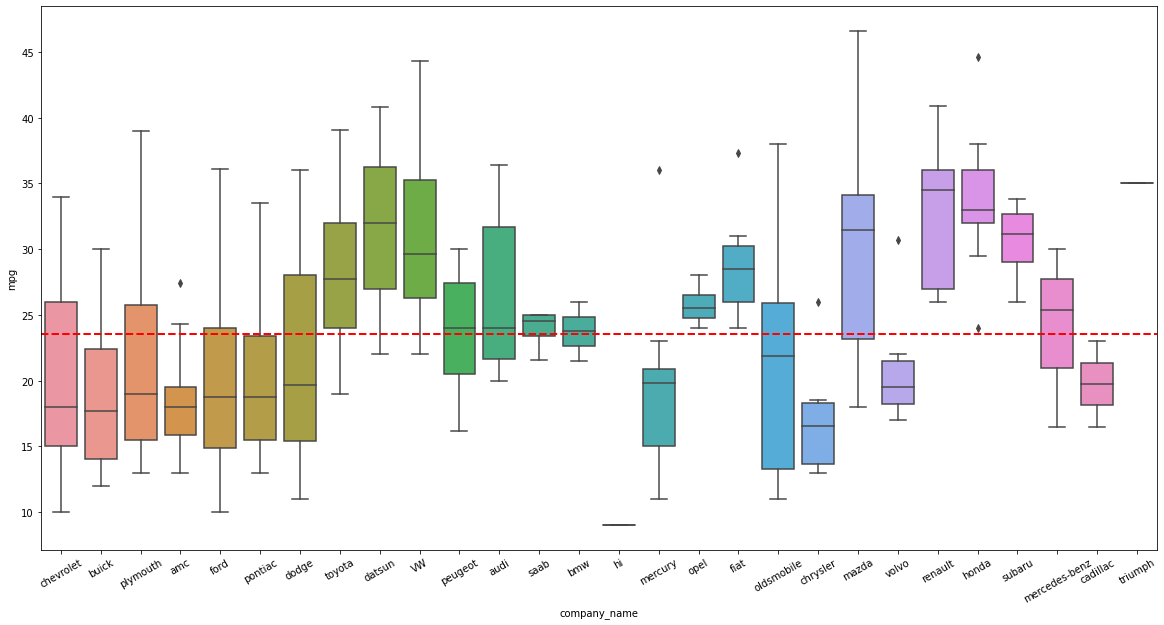

In [18]:
categorical_relationship_vs_mpg('company_name', auto_mpg_data_relationship)

In [39]:
## asdfasdf
usa_mpg_max = auto_mpg_data_relationship[auto_mpg_data_relationship['country_code'] == 'USA']['mpg'].max()
usa_mpg_min = auto_mpg_data_relationship[auto_mpg_data_relationship['country_code'] == 'USA']['mpg'].min()

europe_mpg_max = auto_mpg_data_relationship[auto_mpg_data_relationship['country_code'] == 'Europe']['mpg'].max()
europe_mpg_min = auto_mpg_data_relationship[auto_mpg_data_relationship['country_code'] == 'Europe']['mpg'].min()

japan_mpg_max = auto_mpg_data_relationship[auto_mpg_data_relationship['country_code'] == 'Japan']['mpg'].max()
japan_mpg_min = auto_mpg_data_relationship[auto_mpg_data_relationship['country_code'] == 'Japan']['mpg'].min()

In [47]:
auto_mpg_data_relationship[auto_mpg_data_relationship['mpg'] == usa_mpg_max].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,country_code,company_name
351,39,4,86.0,64.0,1875.0,16.4,81,USA,plymouth


In [36]:
auto_mpg_data_relationship[auto_mpg_data_relationship['mpg'] == usa_mpg_min].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,country_code,company_name
34,9,8,304.0,193.0,4732.0,18.5,70,USA,hi


In [42]:
auto_mpg_data_relationship[auto_mpg_data_relationship['mpg'] == europe_mpg_max].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,country_code,company_name
332,44.3,4,90.0,48.0,2085.0,21.7,80,Europe,VW


In [43]:
auto_mpg_data_relationship[auto_mpg_data_relationship['mpg'] == europe_mpg_min].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,country_code,company_name
284,16.2,6,163.0,133.0,3410.0,15.8,78,Europe,peugeot


In [44]:
auto_mpg_data_relationship[auto_mpg_data_relationship['mpg'] == japan_mpg_max].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,country_code,company_name
329,46.6,4,86.0,65.0,2110.0,17.9,80,Japan,mazda


In [45]:
auto_mpg_data_relationship[auto_mpg_data_relationship['mpg'] == japan_mpg_min].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,country_code,company_name
0,18,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet
2,18,8,318.0,150.0,3436.0,11.0,70,USA,plymouth
22,18,6,199.0,97.0,2774.0,15.5,70,USA,amc
44,18,6,232.0,100.0,3288.0,15.5,71,USA,amc
52,18,6,258.0,110.0,2962.0,13.5,71,USA,amc


According to the company that produces we can see that most companies have cars above and below the average but the most relevant thing is that some companies produced all cars above the mpg average such as opel, fiat, renault, honda, subaru.
We can also note some relevant companies with these data such as the companies with the highest and lowest fuel efficiency according to the country of the company:
    
    -  MPG max in USA -> plymouth
    -  MPG min in USA -> hi
    
    -  MPG max in Europe -> VW or Volkwagen
    -  MPG min in Europe -> peugeot
    
    -  MPG max in Japan -> mazda
    -  MPG min in Japan -> chevrolet, plymouth, amc


### Correlation

### Stats

In [28]:
auto_mpg_data_raw[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']].describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.312814,38.345319,46.0,75.250,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


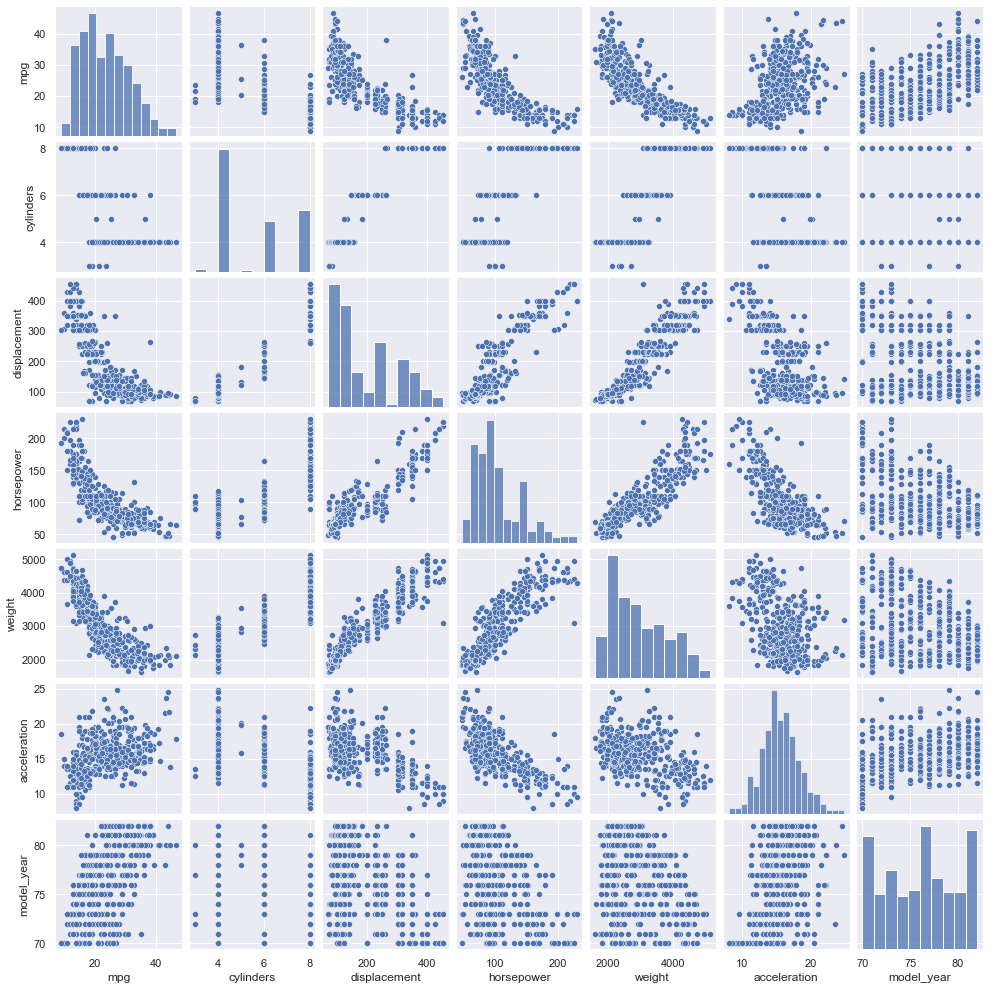

In [23]:
sns.set()
sns.pairplot(auto_mpg_data_relationship, height = 2.0)
plt.show()

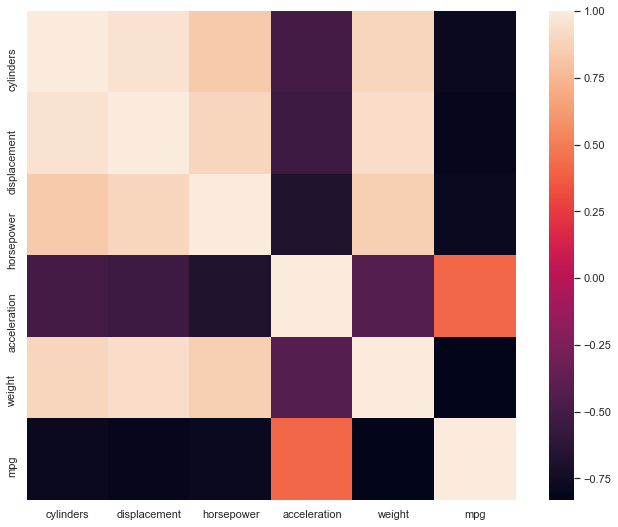

In [25]:
factors = ['cylinders','displacement','horsepower','acceleration','weight','mpg']
corrmat = auto_mpg_data_raw[factors].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

### Horsepower vs MPG

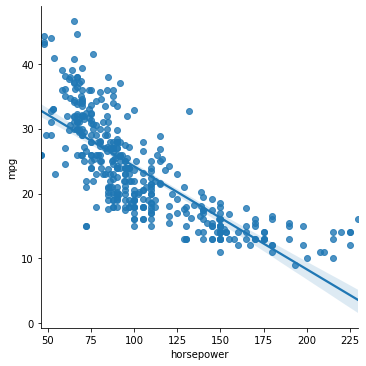

In [19]:
discrete_relationship_vs_mpg('horsepower', auto_mpg_data_raw)

The relationship linear between horsepower and mpg is inverse as we can see in the graph and that implies that each time the mpg increases, the horsepower decreases, which implies that each time the car has more power it needs more fuel.

### Weight vs MPG

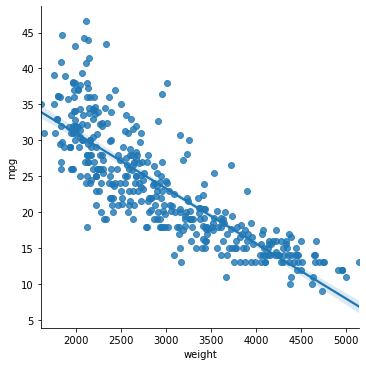

In [20]:
discrete_relationship_vs_mpg('weight', auto_mpg_data_raw)

The relationship between weight and mpg is inverse as we can see in the graph and that implies that each time the mpg increases, the weight decreases, which implies that each time the car is heavier it needs more fuel


### Displacement vs MPG

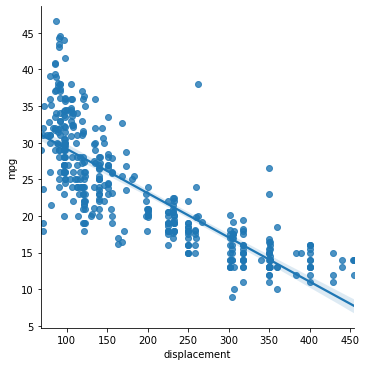

In [21]:
discrete_relationship_vs_mpg('displacement', auto_mpg_data_raw)

The relationship between distance and mpg is inverse as we can see in the graph and that implies that each time the mpg increases, the distance decreases, which implies that each time the car has more distance traveled, the fuel increases.


### Acceleration vs MPG

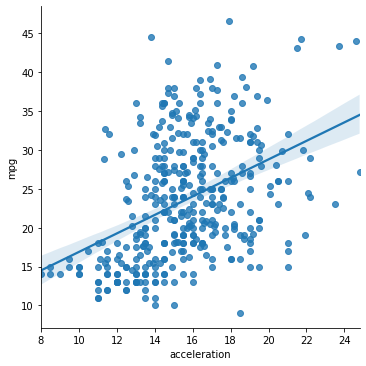

In [22]:
discrete_relationship_vs_mpg('acceleration', auto_mpg_data_raw)

The relationship between acceleration and mpg cannot be evidenced by the graph as we can see the points are quite scattered